# Importing Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [8]:
dataset = pd.read_csv('../Dataset/insurance_data.csv')
#separating independent and dependent variable
X = dataset.iloc[:,:-1]
y = dataset.iloc[:, -1]

Data Preview

In [9]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Finding correlation between each variables/features

<AxesSubplot:>

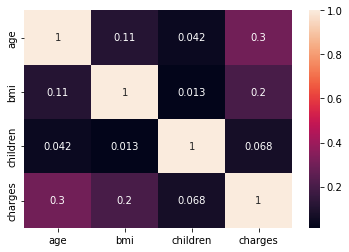

In [11]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot= True)

# This tell there is stronger relation between age and charges, i.e. more the age more the insurance charges.

# Finding NULL values in dataset

In [13]:
dataset.isnull().values.any()
# No NULL record found in data

False

# Encode the categorical variables

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1,4,5])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [17]:
X

array([[ 1.  ,  0.  ,  0.  , ..., 19.  , 27.9 ,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 33.77,  1.  ],
       [ 0.  ,  1.  ,  1.  , ..., 28.  , 33.  ,  3.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ..., 18.  , 36.85,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 21.  , 25.8 ,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 61.  , 29.07,  0.  ]])

# Splitting the dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# 80-20 split into train-test respectively

In [20]:
X_train


array([[ 0.  ,  1.  ,  0.  , ..., 37.  , 34.1 ,  4.  ],
       [ 0.  ,  1.  ,  1.  , ..., 18.  , 34.43,  0.  ],
       [ 1.  ,  0.  ,  0.  , ..., 23.  , 36.67,  2.  ],
       ...,
       [ 0.  ,  1.  ,  1.  , ..., 40.  , 25.08,  0.  ],
       [ 0.  ,  1.  ,  1.  , ..., 19.  , 35.53,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 33.  , 18.5 ,  1.  ]])

In [25]:
y_train

621     40182.24600
194      1137.46970
240     38511.62830
1168     4670.64000
1192    13019.16105
           ...     
763      3070.80870
835      7160.33030
1216     5415.66120
559      1646.42970
684      4766.02200
Name: charges, Length: 1070, dtype: float64

# Fitting into Model

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Prediction

In [27]:
y_pred = regressor.predict(X_test)

In [29]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_pred))

5641.62655885019

# Checking the model accuracy with R2 score


In [34]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680434